**Background**

E-commerce companies like Amazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.


**Introduction to Recommendation systems**


A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT plateforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Recommender system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

**What recommeder system can solve ?**

1.  It can help the user to find the right product.
2.  It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3.  It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4.  It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.

**Types of recommendations**

There are mainly 6 types of the recommendations systems :-

1.  Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2.  Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions


**Attribute Information:**

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

In [ ]:
import pandas as pd  #import libraries
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [ ]:
!chmod 777 /content/kaggle.json

In [ ]:
!mkdir /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!ls /root

In [ ]:
!mv /content/kaggle.json /root/.kaggle

In [ ]:
!kaggle datasets download -d irvifa/amazon-product-reviews

401 - Unauthorized


In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od


In [ ]:
import kaggle    # connect from kaggle using API

# No need to specify the api_key argument, as it reads the API key from kaggle.json
kaggle.api.authenticate()

# Replace 'username/dataset-name' with the actual dataset name on Kaggle
dataset_url = 'https://www.kaggle.com/datasets/irvifa/amazon-product-reviews'

# Download the dataset using opendatasets
od.download(dataset_url, data_dir='./', force=True)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: justinpinto12
Your Kaggle Key: ··········


100%|██████████| 109M/109M [00:01<00:00, 92.8MB/s] 


The Amazon product review dataset is huge, size of the dataset is 320 MB so it's recommended to download using the Kaggle repository which will be handy for further execution and will save your time and resources.

In [ ]:
#load the dataframe and set column name
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [ ]:
df.shape

(7824482, 4)

In [ ]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

Since our dataset is too big and it will be difficult to analyze the entire dataset due to limited resources,thats'why I am randomly taking 20% of the data as sample out of the whole dataset which is 1564896.

In [ ]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [ ]:
#after taking samples drop df to release the memory occupied by entire dataframe
del df

In [ ]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A3LD49L6EDO17P,B005HMKKH4,4.0,1378252800
1,A38GY97KV9KH0Z,B0089E5R0W,4.0,1370736000
2,A1WREQK9B7GC1E,B00946XHI8,4.0,1395878400
3,A10PTPU570JJI9,B0003QE3OA,5.0,1105574400
4,AOD0LOUQ31HOK,B00AAIPT76,5.0,1388793600


In [ ]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [ ]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

In [ ]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.012549e+00
std,1.381127e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

In [ ]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [ ]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [ ]:
electronics_data.head()

,userId,productId,rating
0,A3LD49L6EDO17P,B005HMKKH4,4.0
1,A38GY97KV9KH0Z,B0089E5R0W,4.0
2,A1WREQK9B7GC1E,B00946XHI8,4.0
3,A10PTPU570JJI9,B0003QE3OA,5.0
4,AOD0LOUQ31HOK,B00AAIPT76,5.0


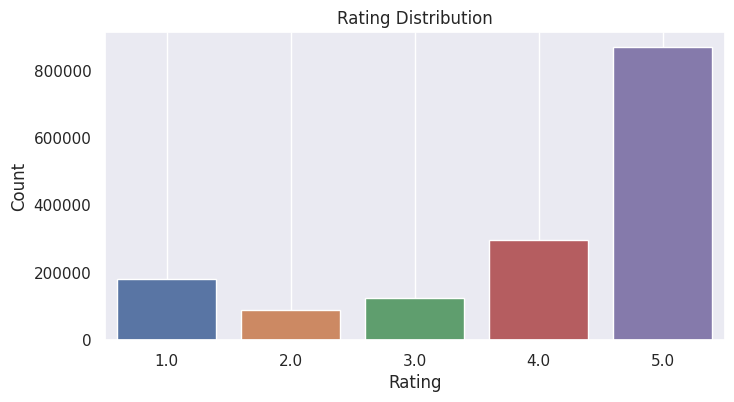

In [ ]:
plt.figure(figsize=(8,4))  # PLOT RATING DIST
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [ ]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225379
Total unique products :  237548


analyzing the rating by user

In [ ]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()  #PER USER GIVEN RATING

userId
A5JLAU2ARJ0BO     110
ADLVFFE4VBT8      103
A6FIAB28IS79       92
A3OXHLG6DIBRW8     81
A1ODOGXEYECQQ8     81
Name: rating, dtype: int64

In [ ]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))  #THOSE USER GIVEN MORE THAN 50 RATING

No of rated product more than 50 per user : 29 


**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [ ]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50) #PRODUCTS THAT GOT MORE RATINGS

In [ ]:
data.head()

,userId,productId,rating
0,A3LD49L6EDO17P,B005HMKKH4,4.0
1,A38GY97KV9KH0Z,B0089E5R0W,4.0
2,A1WREQK9B7GC1E,B00946XHI8,4.0
4,AOD0LOUQ31HOK,B00AAIPT76,5.0
6,A1GSBIM9BPIN51,B005C298UY,4.0


In [ ]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False) #TOP RATED PRODUCTS

In [ ]:
no_of_rating_per_product.head()

productId
B0074BW614    3654
B00DR0PDNE    3187
B007WTAJTO    2833
B006GWO5WK    2463
B0019EHU8G    2442
Name: rating, dtype: int64

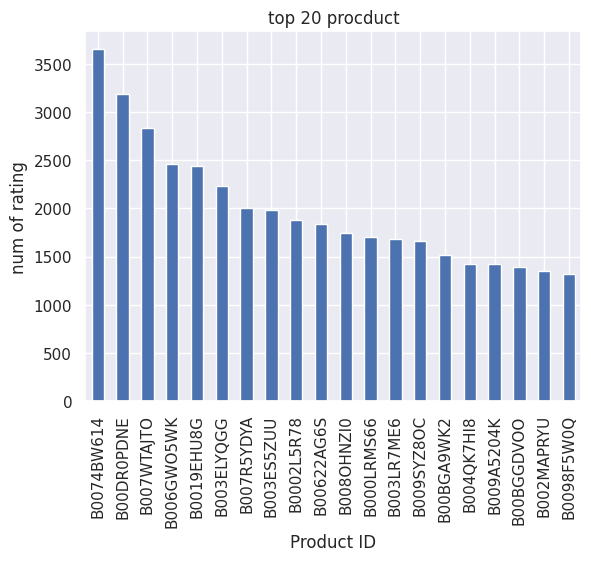

In [ ]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [ ]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [ ]:
mean_rating_product_count.head()   #NEW TABLE TO FIND AVERAGE RATING PRODUCTS

,rating
productId,
0972683275,4.558685
1400501466,3.622642
1400532655,3.843750
140053271X,3.826667
B00000DM9W,4.635135


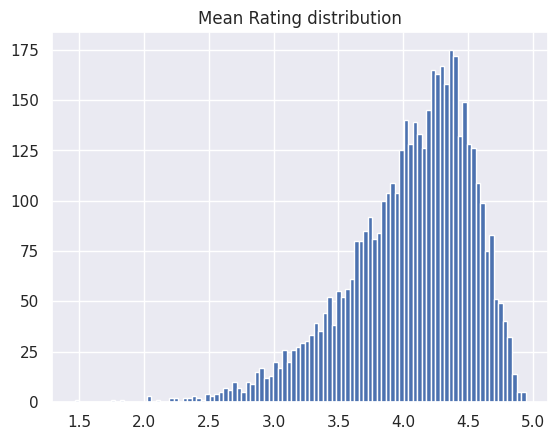

In [ ]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [ ]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9230736282913818

In [ ]:
#it is highly negative skewed meaning that maximum products get review more than mean

In [ ]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [ ]:
mean_rating_product_count.head()  # NO OF RATINGS THAN GAVE THE MEAN RATING

,rating,rating_counts
productId,,
0972683275,4.558685,213
1400501466,3.622642,53
1400532655,3.843750,96
140053271X,3.826667,75
B00000DM9W,4.635135,74


In [ ]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]  #HIGHEST RATED PRODUCT

,rating,rating_counts
productId,,
B0074BW614,4.48659,3654


In [ ]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])  #RECORD WHICH HAS THE LEAST RATING

min average rating product :  50
total min average rating products :  106


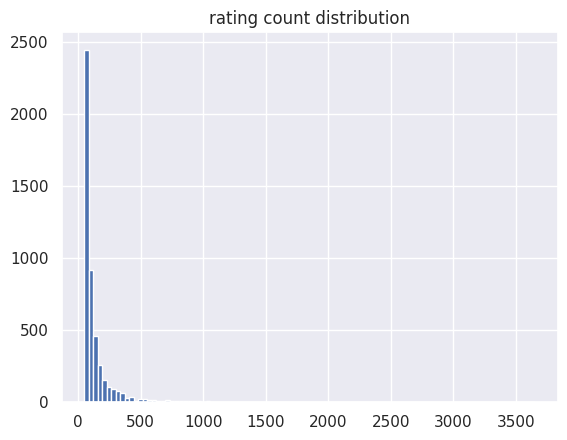

In [ ]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

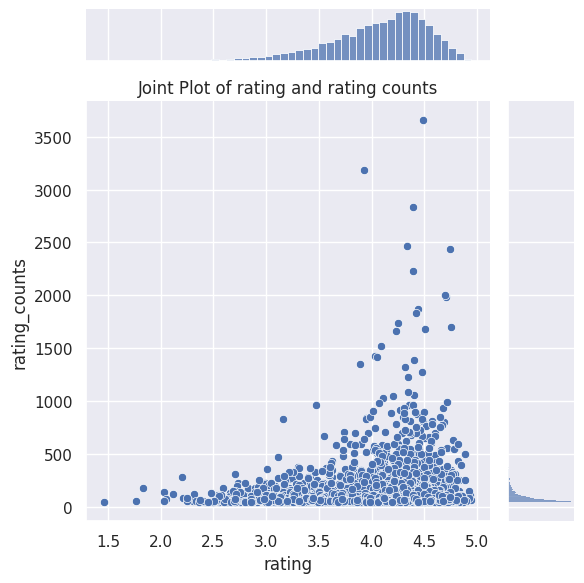

In [ ]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

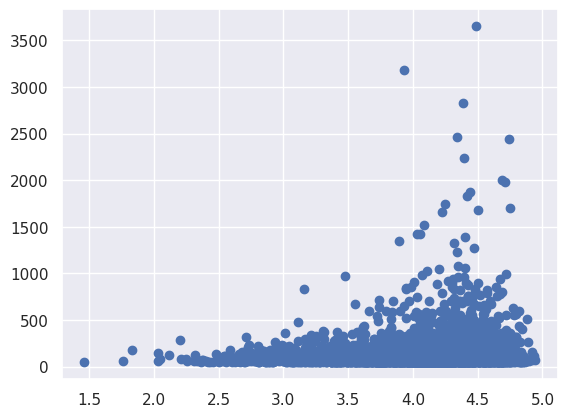

In [ ]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [ ]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts']))) #CORRELATION B/W RATING AND RATING COUNT

Correlation between Rating and Rating Counts is : 0.11395152354573947 


**Collaberative filtering (Item-Item recommedation)**

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [ ]:
#import surprise library for collebrative filtering
!pip install surprise  #BASICALLY USED FOR RECOM PURPOSE
from surprise import KNNWithMeans  #MODEL IN SUPRISE
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163334 sha256=2d59cfd5df2863bf25e264207bc0cdc330708e6c40f4c4c3a53af6e37af8f05f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))              #RATING B/W 1-5
surprise_data = Dataset.load_from_df(data,reader)  # NEW DF

In [ ]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)     #WE ARE USING COLL BASED FILTERING

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
#make prediction using testset
test_pred=algo.test(testset)

In [ ]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)  # NO NEED FOR YTEST AND YPRED IN SUPRISE

Item-based Model : Test Set
RMSE: 1.3118


1.3117665336833062

**Model-based collaborative filtering system**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [ ]:
data2=data.sample(20000) # 20000 SAMPLES TO CREATE PIVOT TABLE
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)  #WHERE VALUE NOT PRESENT PUT 0
ratings_matrix.head()

productId,0972683275,1400501466,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000JI4F,B00000K135,...,B00HVLUR86,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00I9K3ZQ4,B00IF70QCW,B00IGISO9C,B00INNP5VU,B00IO1V33U,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A0155588306XZTNDG1AB5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02316993JW3OCNJUJNF3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A036040922RLTEL1GK62Y,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03637573RFYH257VYT5W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A04523701ZTDV9AGO09EC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [ ]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19876, 4408)

In [ ]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A0155588306XZTNDG1AB5,A02316993JW3OCNJUJNF3,A036040922RLTEL1GK62Y,A03637573RFYH257VYT5W,A04523701ZTDV9AGO09EC,A04813313D352G2KMZ4VY,A051295237AOGYT248D6F,A05674762XDASS577RVJV,A05715762RHRI14OP7GXB,A06098033LVG1OIVWUXUL,...,AZXYT7ZNTL8P9,AZY0H5EN5US7U,AZY4LNF2R9ZX4,AZY9H78K5ZK52,AZYECKC9WRT05,AZYJE40XW6MFG,AZYUM5FOG0QTC,AZYWG20GP2ETU,AZYZIQ017X4FQ,AZZN44MFZIJFH
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_ratings_matrix.shape

(4408, 19876)

In [ ]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD  # TO REDUCE DIMENSION FOR BETTER PRED
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4408, 10)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape   #TO FIND CLOSENESS B/W EACH

(4408, 4408)

In [ ]:
x_ratings_matrix.index[10]  #10TH RECORD PROD

'B00000K2YR'

In [ ]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)  #PROD NAME
product_id=product_names.index(i)           #PROD INDEX
print(product_id)

13


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4408,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape  #RECOM PROD HAVING HIGH CORR (590 RECORDS)

(590, 4408)

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['0972683275',
 '140053271X',
 'B00000K135',
 'B00001OWYM',
 'B00001P4ZH',
 'B00001W0DH',
 'B00004T1XK',
 'B00004TBLW',
 'B00004TWM6',
 'B00004WCGF',
 'B00004ZCJE',
 'B0000510ZO',
 'B000058BCQ',
 'B00005ARK3',
 'B00005K47X',
 'B000063574',
 'B00006B9CR',
 'B00006HYPV',
 'B00006IS4X',
 'B00007AKDL']

In [ ]:
ss = pd.DataFrame(recommend)

In [ ]:
ss.head()

,0
0,0972683275
1,140053271X
2,B00000K135
3,B00001OWYM
4,B00001P4ZH
